# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\WELCOME\OneDrive\Desktop\restaurant_sales_data.csv")

# Checking the data

In [3]:
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [4]:
df.tail()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet
17533,ORD_680707,CUST_006,Desserts,NaN,7.0,4.0,28.0,2023-01-07,NaN


# Understanding the data

## Shape and Data Structure

In [5]:
df.shape

(17534, 9)

In [6]:
df.columns

Index(['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method'],
      dtype='object')

## Data types, nulls and duplicates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## Statistical Summary of data

In [10]:
df.describe(include='all')

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
count,17534,17534,17534,15776,16658.000000,17104.000000,17104.000000,17534,16452
unique,17534,100,5,26,NaN,NaN,NaN,730,3
top,ORD_680707,CUST_066,Main Dishes,Pasta Alfredo,NaN,NaN,NaN,2023-11-25,Credit Card
freq,1,207,3551,998,NaN,NaN,NaN,42,5504
mean,NaN,NaN,NaN,NaN,6.586325,3.014149,19.914494,NaN,NaN
std,NaN,NaN,NaN,NaN,4.834652,1.414598,18.732549,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,2.000000,7.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,3.000000,15.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.000000,4.000000,25.000000,NaN,NaN


# Data Cleaning

## Saving a copy of raw data

In [11]:
df_raw = df.copy()

## Standardizing the column names

In [12]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('-', '_'))

In [13]:
df.columns

Index(['order_id', 'customer_id', 'category', 'item', 'price', 'quantity',
       'order_total', 'order_date', 'payment_method'],
      dtype='object')

## Removing Duplicates

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17529    False
17530    False
17531    False
17532    False
17533    False
Length: 17534, dtype: bool

But in our case, the data is duplicates free

In [15]:
df.duplicated().any()

np.False_

In [16]:
print(df.duplicated(subset=['order_id']).sum())

0


In [17]:
print(df.duplicated().sum())

0


## Fixing Data Types

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        17534 non-null  object        
 1   customer_id     17534 non-null  object        
 2   category        17534 non-null  object        
 3   item            15776 non-null  object        
 4   price           16658 non-null  float64       
 5   quantity        17104 non-null  float64       
 6   order_total     17104 non-null  float64       
 7   order_date      17534 non-null  datetime64[ns]
 8   payment_method  16452 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.2+ MB


## Handling missing values

In [20]:
df.isnull().sum().sort_values(ascending=False)

item              1758
payment_method    1082
price              876
order_total        430
quantity           430
order_id             0
category             0
customer_id          0
order_date           0
dtype: int64

In [21]:
(df.isnull().mean() * 100).round(2).sort_values(ascending=False)

item              10.03
payment_method     6.17
price              5.00
order_total        2.45
quantity           2.45
order_id           0.00
category           0.00
customer_id        0.00
order_date         0.00
dtype: float64

In [22]:
df.fillna({'item': 'Unknown'}, inplace=True)

In [23]:
df.fillna({'payment_method': 'Unknown'}, inplace=True)

In [24]:
price = df['price']
print(price.min())
print(price.max())

1.0
20.0


In [25]:
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
outliers = price[(price < Q1 - 1.5*IQR) | (price > Q3 + 1.5*IQR)]
print(outliers)

2        15.0
5        18.0
7        15.0
9        14.0
11       18.0
         ... 
17453    18.0
17480    18.0
17490    18.0
17495    20.0
17505    15.0
Name: price, Length: 2311, dtype: float64


In [26]:
print(price.skew())

1.3525382646007056


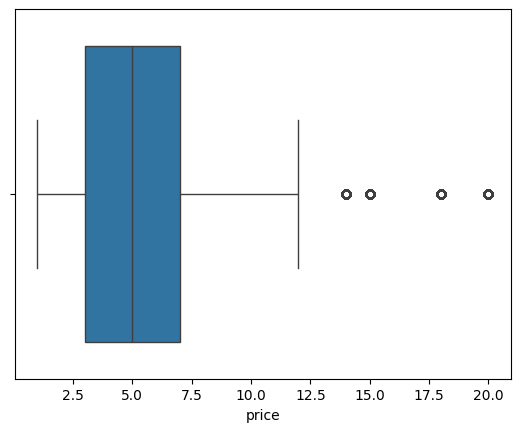

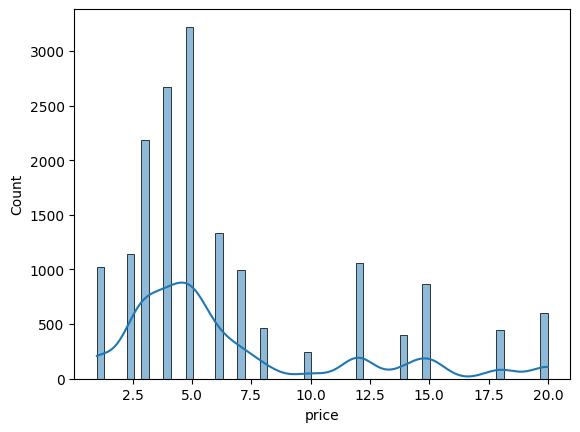

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=price)   # shows outliers
plt.show()

sns.histplot(price, kde=True)   # shows skewness
plt.show()

In [28]:
df.fillna({'price': df['price'].median()}, inplace=True)

In [29]:
df.isnull().sum().sort_values(ascending=False)

order_total       430
quantity          430
order_id            0
customer_id         0
category            0
price               0
item                0
order_date          0
payment_method      0
dtype: int64

In [30]:
order_total = df['order_total']
print(df.order_total.min())
print(df.order_total.max())

1.0
100.0


In [31]:
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
outliers = order_total[(order_total < Q1 - 1.5*IQR) | (order_total > Q3 + 1.5*IQR)]
print(outliers)

1        12.0
2        60.0
4        48.0
5        90.0
6        20.0
         ... 
17527    12.0
17528    20.0
17530    15.0
17531    20.0
17533    28.0
Name: order_total, Length: 10721, dtype: float64


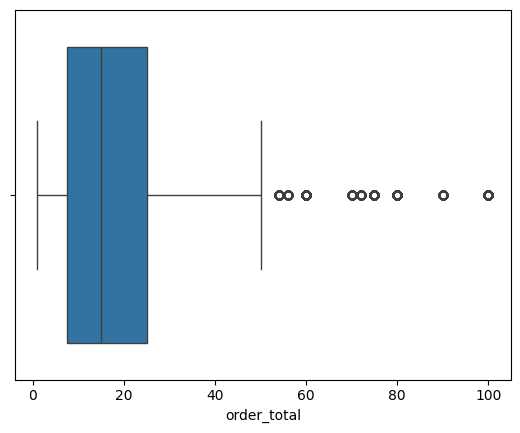

In [32]:
sns.boxplot(x=order_total)
plt.show()

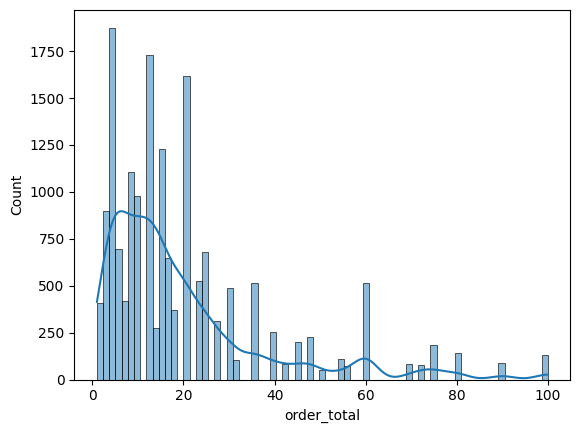

In [35]:
sns.histplot(order_total, kde=True)
plt.show()

In [36]:
df.fillna({'order_total': df['order_total'].median()}, inplace=True)

In [37]:
df.isnull().sum().sort_values(ascending=True)

order_id            0
customer_id         0
category            0
item                0
price               0
order_total         0
order_date          0
payment_method      0
quantity          430
dtype: int64

In [38]:
quantity = df['quantity']
print(quantity.min())
print(quantity.max())

1.0
5.0


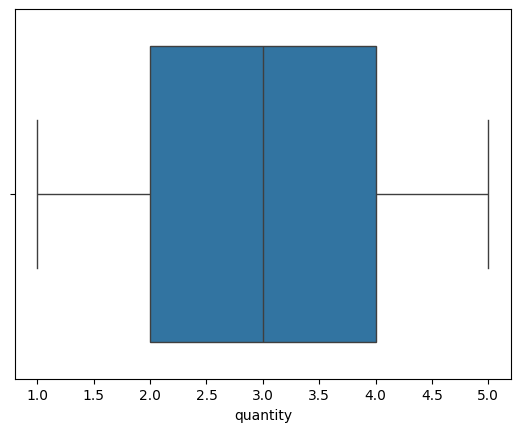

In [39]:
sns.boxplot(x=quantity)
plt.show()

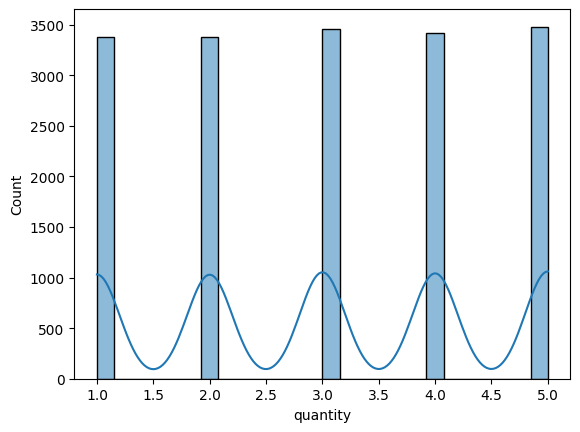

In [40]:
sns.histplot(quantity, kde=True)
plt.show()

In [41]:
df.fillna({'quantity': df['quantity'].mean()}, inplace=True)

In [42]:
df.isnull().sum()

order_id          0
customer_id       0
category          0
item              0
price             0
quantity          0
order_total       0
order_date        0
payment_method    0
dtype: int64

In [43]:
df

,order_id,customer_id,category,item,price,quantity,order_total,order_date,payment_method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,Unknown,5.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,Unknown,5.0,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


In [44]:
df['category'].value_counts()

category
Main Dishes    3551
Starters       3527
Desserts       3496
Drinks         3488
Side Dishes    3472
Name: count, dtype: int64

In [45]:
df['item'].value_counts()

item
Unknown               1758
Pasta Alfredo          998
Side Salad             978
Water                  956
Ice Cream              936
French Fries           897
Grilled Chicken        822
Mashed Potatoes        799
Chocolate Cake         798
Coca Cola              756
Cheese Fries           686
Orange Juice           591
Grilled Vegetables     578
Steak                  574
Cheesecake             485
Lemonade               479
Sweet Potato Fries     471
Beef Chili             470
Brownie                469
Fruit Salad            449
Chicken Melt           442
Salmon                 422
Garlic Bread           399
Vegetarian Platter     382
Onion Rings            373
Iced Tea               328
Nachos Grande          238
Name: count, dtype: int64

## Feature Engineering

In [47]:
df['order_hour'] = df['order_date'].dt.hour
df['order_day'] = df['order_date'].dt.day_name()
df['order_month'] = df['order_date'].dt.month

# Validating the data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        17534 non-null  object        
 1   customer_id     17534 non-null  object        
 2   category        17534 non-null  object        
 3   item            17534 non-null  object        
 4   price           17534 non-null  float64       
 5   quantity        17534 non-null  float64       
 6   order_total     17534 non-null  float64       
 7   order_date      17534 non-null  datetime64[ns]
 8   payment_method  17534 non-null  object        
 9   order_hour      17534 non-null  int32         
 10  order_day       17534 non-null  object        
 11  order_month     17534 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(6)
memory usage: 1.5+ MB


In [49]:
df.describe()

,price,quantity,order_total,order_date,order_hour,order_month
count,17534.000000,17534.000000,17534.000000,17534,17534.0,17534.000000
mean,6.507072,3.014149,19.793972,2022-12-28 15:19:09.355538176,0.0,6.527033
min,1.000000,1.000000,1.000000,2022-01-01 00:00:00,0.0,1.000000
25%,4.000000,2.000000,8.000000,2022-06-30 00:00:00,0.0,4.000000
50%,5.000000,3.000000,15.000000,2022-12-25 00:00:00,0.0,7.000000
75%,7.000000,4.000000,24.000000,2023-06-29 00:00:00,0.0,10.000000
max,20.000000,5.000000,100.000000,2023-12-31 00:00:00,0.0,12.000000
std,4.724985,1.397143,18.517022,NaN,0.0,3.438642


# Saving the clean data

In [50]:
df.to_csv(r'C:\Users\WELCOME\OneDrive\Desktop\Food Delivery Data Analysis\data\clean\cleaned_data.csv', index=False)